### Importing the required Libraries

In [780]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### Importing the required data

In [781]:
# importing all the data
campaign_data = pd.read_csv('cupon_redemption/campaign_data.csv')
coupon_item_mapping = pd.read_csv('cupon_redemption/coupon_item_mapping.csv')
customer_demographics = pd.read_csv('cupon_redemption/customer_demographics.csv')
customer_transaction_data = pd.read_csv('cupon_redemption/customer_transaction_data.csv')
item_data = pd.read_csv('cupon_redemption/item_data.csv')
train_data = pd.read_csv('cupon_redemption/train.csv') 
test_data = pd.read_csv('cupon_test.csv')

### Checking each data table

In [782]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [783]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [784]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [785]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [786]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [787]:
train_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [788]:
test_data.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


### Preparing data for the model

In [789]:
#definning a new dataframe as a copy of train_data
data = train_data

In [790]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [791]:
# definning a function to map all the table values into one table
def add_column(column_key,column_name,table_name):
    data[column_name]= data[column_key].map(table_name.set_index(column_key)[column_name])

# defining a function to map values explicitly from one table to other
def add_column_explicit(column_key,column_name,table_name):
    mapping = dict(table_name[[column_key, column_name]].values)
    data[column_name] = data[column_key].map(mapping)

In [792]:
add_column('campaign_id','campaign_type',campaign_data)
add_column('campaign_id','start_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('customer_id','age_range',customer_demographics)
add_column('customer_id','marital_status',customer_demographics)
add_column('customer_id','rented',customer_demographics)
add_column('customer_id','family_size',customer_demographics)
add_column('customer_id','no_of_children',customer_demographics)
add_column('customer_id','income_bracket',customer_demographics)

In [793]:
add_column_explicit('customer_id','item_id',customer_transaction_data)
add_column_explicit('customer_id','date',customer_transaction_data)
add_column_explicit('customer_id','quantity',customer_transaction_data)
add_column_explicit('customer_id','selling_price',customer_transaction_data)
add_column_explicit('customer_id','other_discount',customer_transaction_data)
add_column_explicit('customer_id','coupon_discount',customer_transaction_data)
add_column_explicit('item_id','brand',item_data)
add_column_explicit('item_id','brand_type',item_data)
add_column_explicit('item_id','category',item_data)

In [794]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,Local,Fuel
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,Established,Meat
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,Established,Grocery
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,29771,2013-06-19,1,78.01,0.00,0.0,56,Local,Grocery
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,Established,Packaged Meat


In [795]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 23 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            43661 non-null object
marital_status       25394 non-null object
rented               43661 non-null float64
family_size          43661 non-null object
no_of_children       14056 non-null object
income_bracket       43661 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

#### Cleaning the data by filling NaN

In [796]:
data['age_range'].mode()

0    46-55
dtype: object

In [797]:
data['age_range'].fillna('46-55',inplace=True)

In [798]:
data['age_range'].isnull().values.any()

False

In [799]:
data.groupby('marital_status').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
marital_status,,,,,,,,,,,,,,,,,,,,,,
Married,18811,18811,18811,18811,18811,18811,18811,18811,18811,18811,18811,8898,18811,18811,18811,18811,18811,18811,18811,18811,18811,18811
Single,6583,6583,6583,6583,6583,6583,6583,6583,6583,6583,6583,1370,6583,6583,6583,6583,6583,6583,6583,6583,6583,6583


In [800]:
data['age_range'].fillna('46-55',inplace=True)

In [801]:
data['marital_status'] = data['marital_status'].fillna(pd.Series(np.random.choice(['Married', 'Single'], 
                                                      p=[0.74,0.26], size=len(data))))

In [802]:
data.groupby('rented').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
rented,,,,,,,,,,,,,,,,,,,,,,
0.0,41156,41156,41156,41156,41156,41156,41156,41156,41156,41156,41156,12743,41156,41156,41156,41156,41156,41156,41156,41156,41156,41156
1.0,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,1313,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505


In [803]:
data['rented'] = data['rented'].fillna(pd.Series(np.random.choice([0.0, 1.0], 
                                                      p=[0.94,0.06], size=len(data))))

In [804]:
data.groupby('family_size').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
family_size,,,,,,,,,,,,,,,,,,,,,,
1,13612,13612,13612,13612,13612,13612,13612,13612,13612,13612,13612,0,13612,13612,13612,13612,13612,13612,13612,13612,13612,13612
2,16888,16888,16888,16888,16888,16888,16888,16888,16888,16888,16888,895,16888,16888,16888,16888,16888,16888,16888,16888,16888,16888
3,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267
4,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139
5+,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755


In [805]:
data.groupby('family_size').count()['id']/43661

family_size
1     0.311766
2     0.386798
3     0.143538
4     0.071895
5+    0.086004
Name: id, dtype: float64

In [806]:
data['family_size'] = data['family_size'].fillna(pd.Series(np.random.choice(['1','2','3','4','5+'], 
                                                      p=[0.32,0.39,0.14,0.07,0.08], size=len(data))))

In [807]:
data.groupby('no_of_children').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
no_of_children,,,,,,,,,,,,,,,,,,,,,,
1,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540
2,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
3+,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969


In [808]:
data.groupby('no_of_children').count()['id']/14056

no_of_children
1     0.465282
2     0.252348
3+    0.282371
Name: id, dtype: float64

In [809]:
data['no_of_children'] = data['no_of_children'].fillna(pd.Series(np.random.choice(['1','2','3+'], 
                                                      p=[0.47,0.25,0.28], size=len(data))))

In [810]:
ind = data.groupby('income_bracket').count().index

In [811]:
percents = data.groupby('income_bracket').count()['id']/43661

In [812]:
data['income_bracket'] = data['income_bracket'].fillna(pd.Series(np.random.choice(ind, 
                                                      p=percents, size=len(data))))

In [813]:
#checking the clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 23 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            78369 non-null object
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null object
no_of_children       78369 non-null object
income_bracket       78369 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

#### Checking up the correlation heatmap before feature engineering

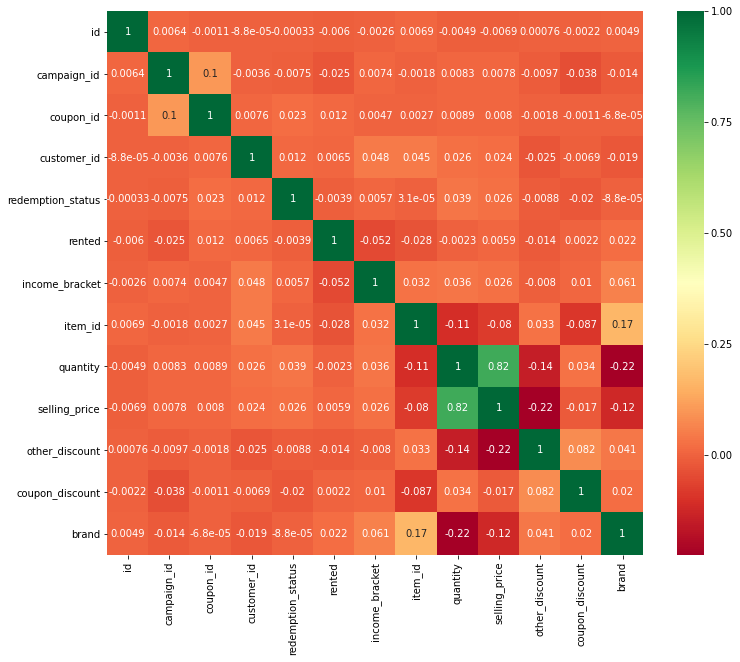

In [814]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)

In [815]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Married,0.0,1,2,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,Local,Fuel
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,2,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,Established,Meat
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,1,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,Established,Grocery
3,7,13,644,1050,0,X,19/05/13,05/07/13,46-55,Married,0.0,3,1,9.0,29771,2013-06-19,1,78.01,0.00,0.0,56,Local,Grocery
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,1,3.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,Established,Packaged Meat


### Feature Engineering

##### Campaign Duration Finding

In [816]:
# creating a slice of the main dataframe
ch_data = data[['start_date','end_date']]

In [817]:
ch_data.head()

,start_date,end_date
0,19/05/13,05/07/13
1,19/05/13,05/07/13
2,11/03/13,12/04/13
3,19/05/13,05/07/13
4,16/02/13,05/04/13


In [818]:
# creating columns for starting day and ending day
ser1=[]
ser2=[]
for i in range(len(ch_data)):
    ser1.append(int(ch_data['start_date'][i][:2]))
    ser2.append(int(ch_data['end_date'][i][:2]))

ch_data['start_day'] = ser1
ch_data['end_day'] = ser2

# creating columns for starting month and ending month
mon1=[]
mon2=[]
for i in range(len(ch_data)):
    mon1.append(int(ch_data['start_date'][i][3:5]))
    mon2.append(int(ch_data['end_date'][i][3:5]))

ch_data['start_month'] = mon1
ch_data['end_month'] = mon2

# creating columns for starting year and ending year
year1=[]
year2=[]
for i in range(len(ch_data)):
    year1.append(2000 + int(ch_data['start_date'][i][6:8]))
    year2.append(2000 +int(ch_data['end_date'][i][6:8]))

ch_data['start_year'] = year1
ch_data['end_year'] = year2

In [819]:
# finding the campaign duration using datetime
diff_start = []
diff_end = []
for a,b,c in zip(ch_data['start_day'],ch_data['start_month'],ch_data['start_year']):
    diff_start.append(datetime.datetime(c,b,a))

for a,b,c in zip(ch_data['end_day'],ch_data['end_month'],ch_data['end_year']):
    diff_end.append(datetime.datetime(c,b,a))

diff = []
for x,y in zip(diff_start,diff_end):
    diff.append((y-x).days)
    
# adding the campaign duration column to the main dataframe
data['campaign_duration'] = diff

In [820]:
fix_data = data

#### Binding point

In [821]:
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 24 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            78369 non-null object
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null object
no_of_children       78369 non-null object
income_bracket       78369 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

In [822]:
fix_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Married,0.0,1,2,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,Local,Fuel,47
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,2,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,Established,Meat,47
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,1,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,Established,Grocery,32
3,7,13,644,1050,0,X,19/05/13,05/07/13,46-55,Married,0.0,3,1,9.0,29771,2013-06-19,1,78.01,0.00,0.0,56,Local,Grocery,47
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,1,3.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,Established,Packaged Meat,48


In [823]:
fix_data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'start_date', 'end_date', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'item_id', 'date', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'brand', 'brand_type', 'category',
       'campaign_duration'],
      dtype='object')

In [824]:
# performing some data encoding 
fix_data['campaign_type'].replace({'X':0,'Y':1},inplace=True)
fix_data['marital_status'].replace({'Married':1,'Single':0},inplace=True)
fix_data['rented'].replace({0.0:0,1.0:1},inplace=True)
fix_data['family_size'].replace({'1':1,'2':2,'3':3,'4':4,'5+':5},inplace=True)
fix_data['no_of_children'].replace({'1':1,'2':2,'3+':3},inplace=True)
fix_data['brand_type'].replace({'Established':1,'Local':0},inplace=True)

In [825]:
# encoding the category column
len(fix_data.groupby('category').count())

16

In [826]:
# getting out the category index
ind = fix_data.groupby('category').count().index

# creating a dictionary of key and value pair
dic_prop = {}
count = 1
for key in ind:
    dic_prop[key] = count
    count+=1
    
# performing the data encoding
fix_data['category'].replace(dic_prop,inplace=True)

In [827]:
# checking out the data 
pd.set_option("display.max_rows", None, "display.max_columns", None)
fix_data.head(3)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration
0,1,13,27,1053,0,0,19/05/13,05/07/13,46-55,1,0.0,1,2,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,0,5,47
1,2,13,116,48,0,0,19/05/13,05/07/13,36-45,1,0.0,2,2,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,1,8,47
2,6,9,635,205,0,1,11/03/13,12/04/13,46-55,1,0.0,2,1,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,1,7,32


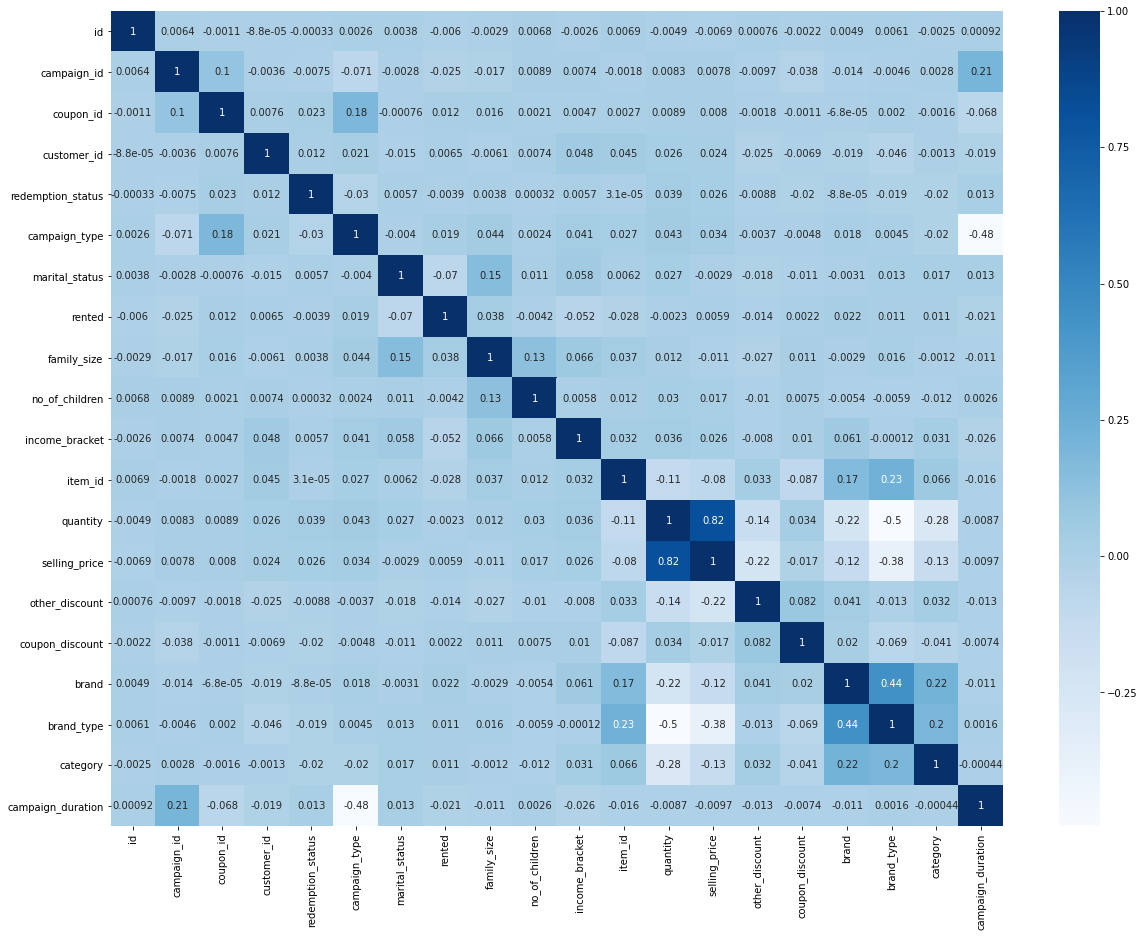

In [828]:
data = fix_data
# plotting a heatmap to check coorelation matrix
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

### Logistic Regression Model Building

In [829]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [830]:
data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'start_date', 'end_date', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'item_id', 'date', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'brand', 'brand_type', 'category',
       'campaign_duration'],
      dtype='object')

In [831]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration
0,1,13,27,1053,0,0,19/05/13,05/07/13,46-55,1,0.0,1,2,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,0,5,47
1,2,13,116,48,0,0,19/05/13,05/07/13,36-45,1,0.0,2,2,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,1,8,47
2,6,9,635,205,0,1,11/03/13,12/04/13,46-55,1,0.0,2,1,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,1,7,32
3,7,13,644,1050,0,0,19/05/13,05/07/13,46-55,1,0.0,3,1,9.0,29771,2013-06-19,1,78.01,0.00,0.0,56,0,7,47
4,9,8,1017,1489,0,0,16/02/13,05/04/13,46-55,1,0.0,2,1,3.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,1,11,48


In [832]:
X = data[['campaign_type','marital_status', 'rented', 'brand_type', 'category','campaign_duration']]
y = data['redemption_status']

In [833]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [834]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [835]:
y_pred=logreg.predict(X_test)

In [836]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9911956105652673
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [837]:
def roc_curve():
    probability = logreg.predict_proba(X_test)[::,1]
    ping, swing, _ = metrics.roc_curve(y_test,  probability)
    auc = metrics.roc_auc_score(y_test, probability)
    plt.plot(ping,swing,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

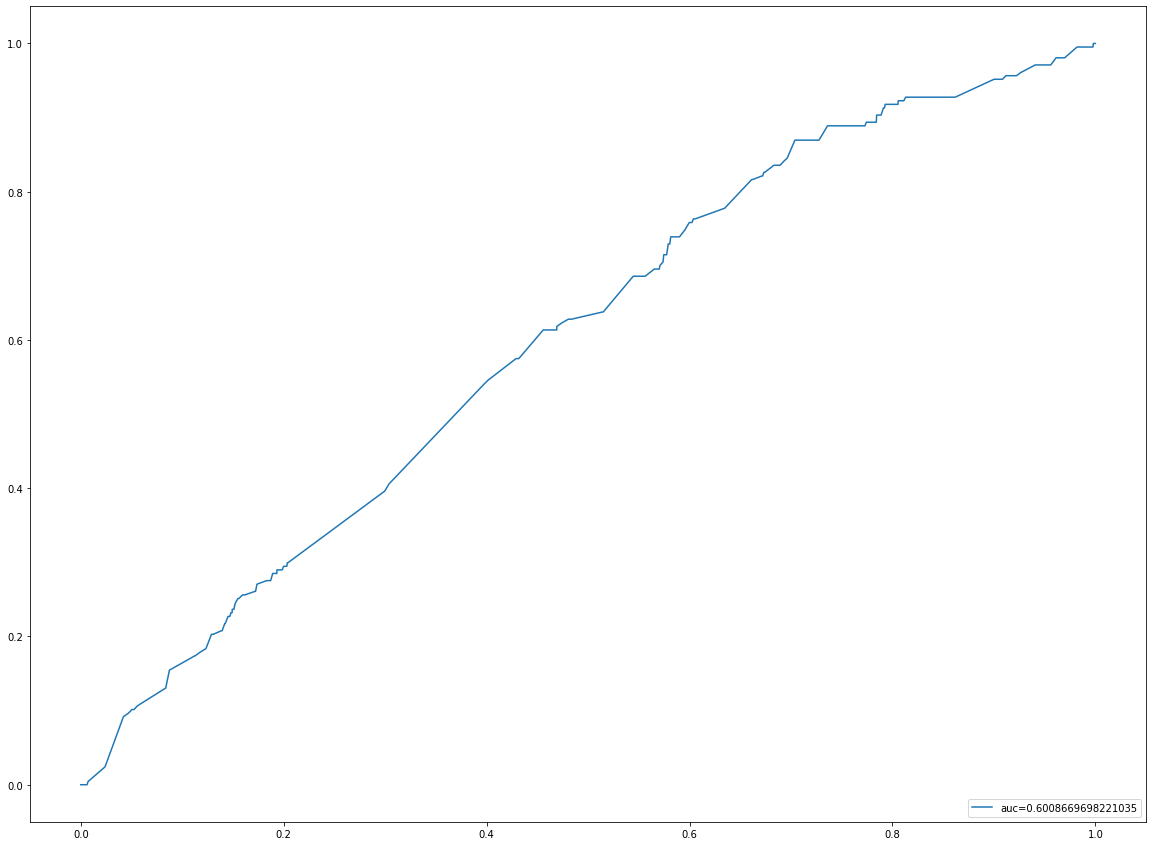

In [838]:
plt.figure(figsize=(20,15))
roc_curve()

In [839]:
from sklearn.tree import DecisionTreeClassifier

In [840]:
Dec_tree = DecisionTreeClassifier()

In [841]:
Dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [842]:
y_pred_dec = Dec_tree.predict(X_test)

In [843]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dec))
print("Precision:",metrics.precision_score(y_test, y_pred_dec))
print("Recall:",metrics.recall_score(y_test,y_pred_dec))
print("F1 Score:",metrics.f1_score(y_test, y_pred_dec))

Accuracy: 0.9910680107183871
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [844]:
def roc_curve_dec():
    probability = Dec_tree.predict_proba(X_test)[::,1]
    ping, swing, _ = metrics.roc_curve(y_test,  probability)
    auc = metrics.roc_auc_score(y_test, probability)
    plt.plot(ping,swing,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

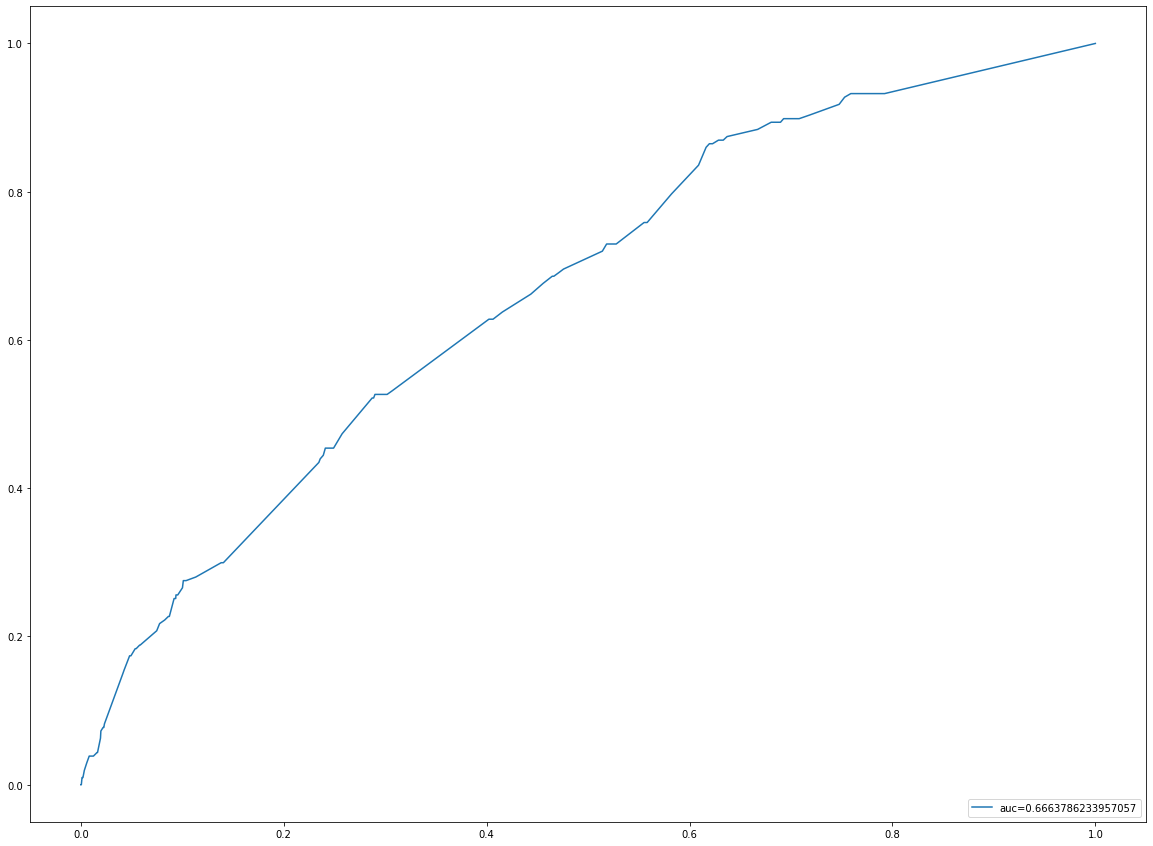

In [845]:
plt.figure(figsize=(20,15))
roc_curve_dec()